In [1]:
import numpy as np
import librosa as libr
import librosa.display as disp
import matplotlib.pyplot as plt
import os
import random
import IPython.display as ipd 

In [2]:
%matplotlib inline

In [3]:
from pesq import pesq

## Noisy Audio

In [4]:
train_data_path = './../data/28/noisy_trainset_28spk_wav'

In [5]:
file_list = os.listdir(train_data_path)
random_file = random.choice(file_list)
sample_file_path = os.path.join(train_data_path, random_file)
sample_file_path

'./../data/28/noisy_trainset_28spk_wav/p244_150.wav'

In [6]:
signal, sample_rate = libr.load(sample_file_path) #sr=22050
signal.shape

(47029,)

In [7]:
sample_rate

22050

In [8]:
fig_size = (8,5)

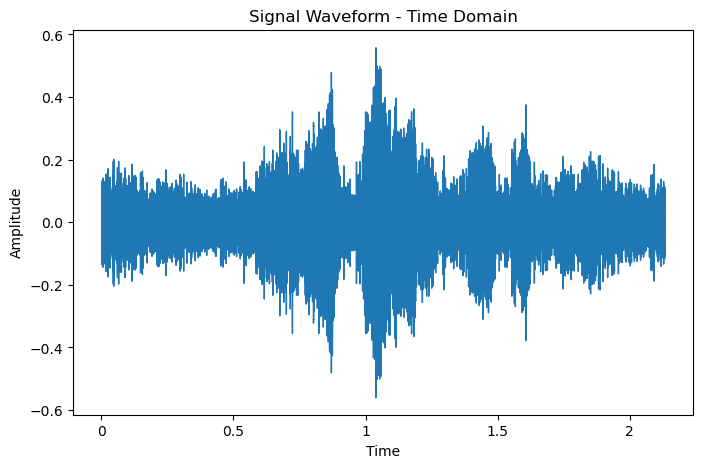

In [9]:
plt.figure(figsize=fig_size)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal Waveform - Time Domain")

disp.waveshow(signal,sr=sample_rate)
ipd.Audio(sample_file_path)

In [10]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency =np.linspace(0,sample_rate,len(magnitude))

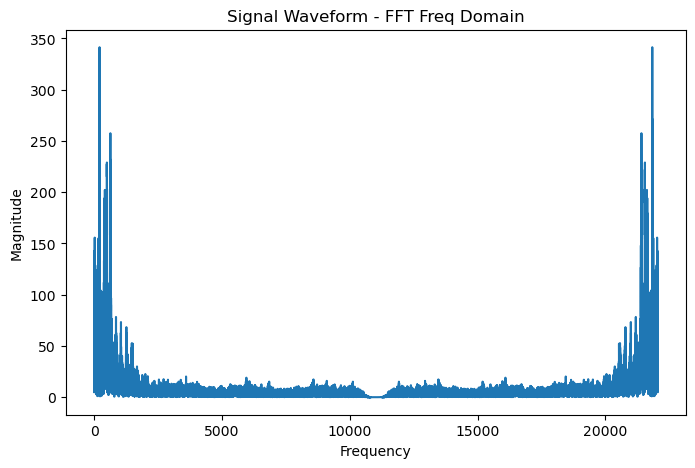

In [11]:
plt.figure(figsize=fig_size)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Signal Waveform - FFT Freq Domain")

plt.plot(frequency,magnitude)

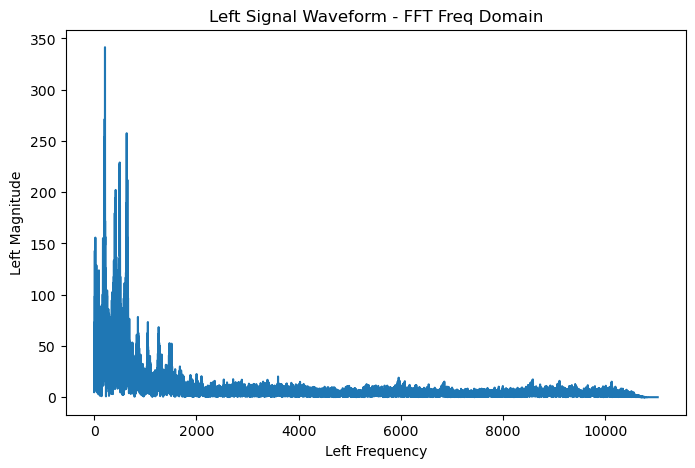

In [12]:
l = len(signal)
left_frequency = frequency[:int(l/2)]
left_magnitude = magnitude[:int(l/2)]

plt.figure(figsize=fig_size)
plt.xlabel("Left Frequency")
plt.ylabel("Left Magnitude")
plt.title("Left Signal Waveform - FFT Freq Domain")

plt.plot(left_frequency,left_magnitude)

In [13]:
n_fft = 2048
hop_len = 512

stft = libr.core.stft(signal, n_fft=n_fft, hop_length=hop_len)
spectogram = np.abs(stft)

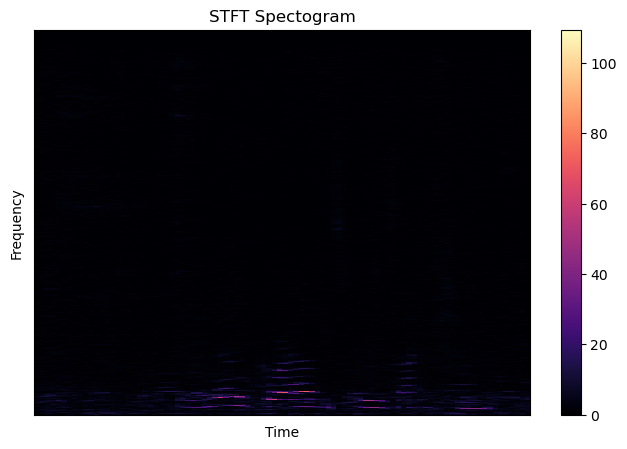

In [14]:
plt.figure(figsize=fig_size)
disp.specshow(spectogram,sr=sample_rate,hop_length=hop_len)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("STFT Spectogram")
plt.colorbar()

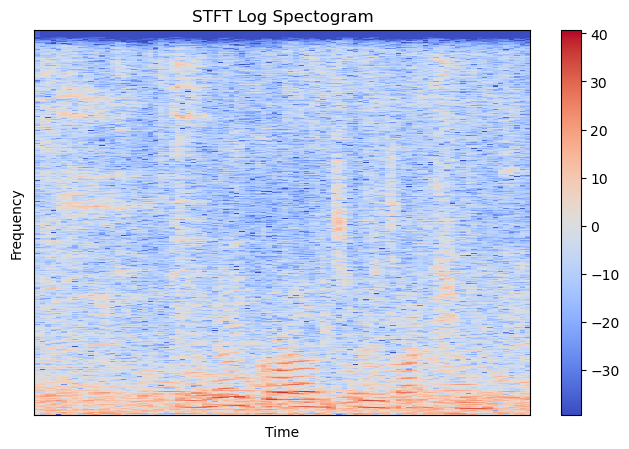

In [15]:
plt.figure(figsize=fig_size)
log_spectogram = libr.amplitude_to_db(spectogram)
disp.specshow(log_spectogram,sr=sample_rate,hop_length=hop_len)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("STFT Log Spectogram")
plt.colorbar()

In [16]:
n_coeffs = 15
mfcc = libr.feature.mfcc(y=signal,n_fft=n_fft, hop_length=hop_len, n_mfcc=n_coeffs)

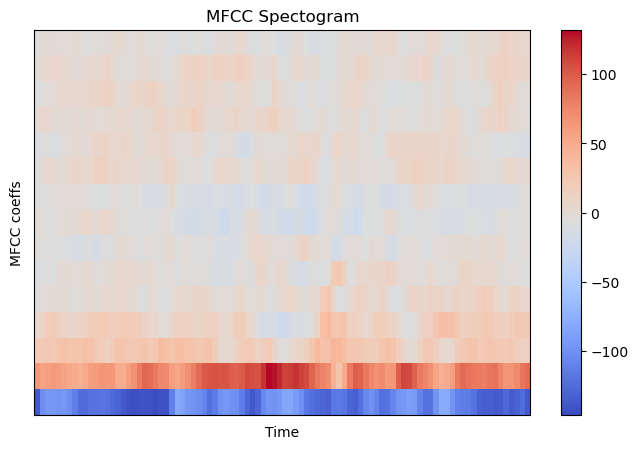

In [17]:
plt.figure(figsize=fig_size)
disp.specshow(mfcc,sr=sample_rate,hop_length=hop_len)
plt.xlabel("Time")
plt.ylabel("MFCC coeffs")
plt.title("MFCC Spectogram")
plt.colorbar()

In [18]:
mfcc.shape

(15, 92)

## Clean Audio

In [19]:
clean_sample_file_path = sample_file_path.replace('noisy','clean')
clean_sample_file_path

'./../data/28/clean_trainset_28spk_wav/p244_150.wav'

In [20]:
clean_signal, sample_rate = libr.load(clean_sample_file_path) #sr=22050
clean_signal.shape

(47029,)

In [21]:
sample_rate

22050

In [22]:
fig_size = (8,5)

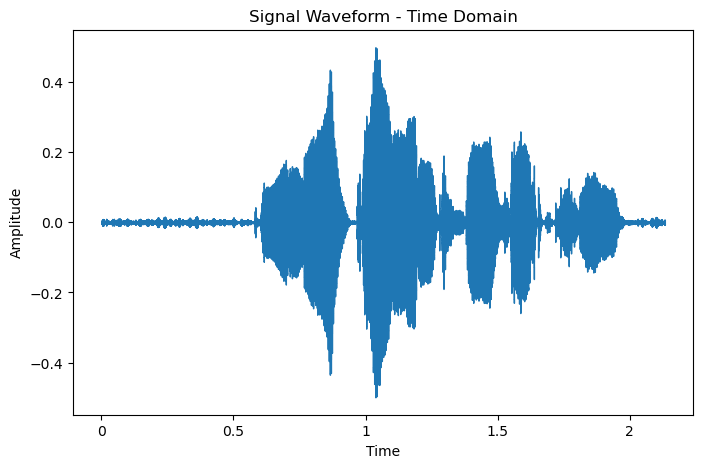

In [23]:
plt.figure(figsize=fig_size)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Clean Signal Waveform - Time Domain")

disp.waveshow(clean_signal,sr=sample_rate)
ipd.Audio(clean_sample_file_path)

In [24]:
fft = np.fft.fft(clean_signal)
magnitude = np.abs(fft)
frequency =np.linspace(0,sample_rate,len(magnitude))

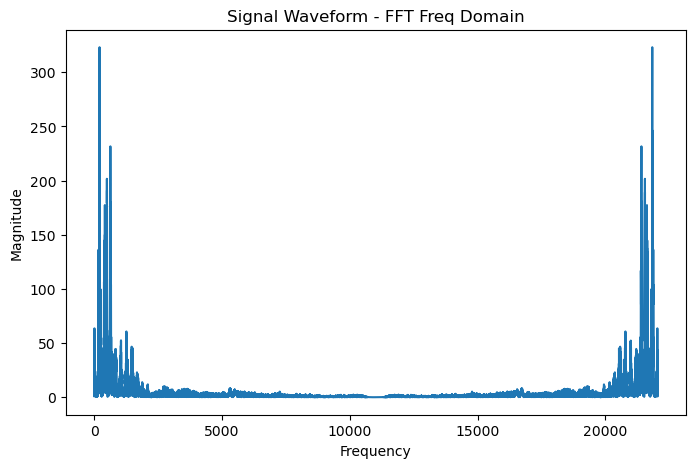

In [25]:
plt.figure(figsize=fig_size)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("clean_signal Waveform - FFT Freq Domain")

plt.plot(frequency,magnitude)

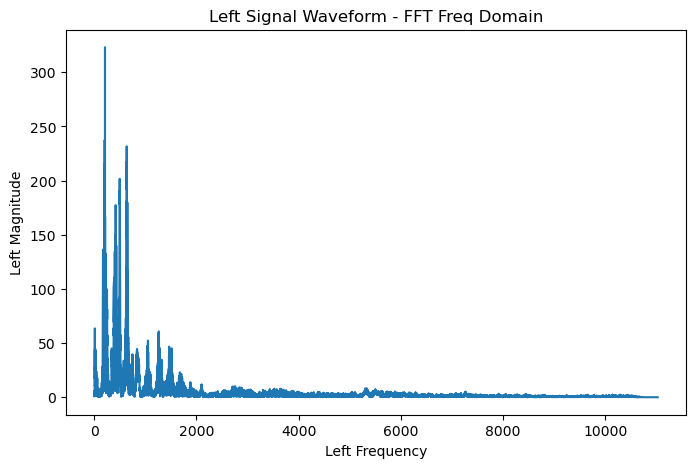

In [26]:
l = len(clean_signal)
left_frequency = frequency[:int(l/2)]
left_magnitude = magnitude[:int(l/2)]

plt.figure(figsize=fig_size)
plt.xlabel("Left Frequency")
plt.ylabel("Left Magnitude")
plt.title("Left clean_signal Waveform - FFT Freq Domain")

plt.plot(left_frequency,left_magnitude)

In [27]:
n_fft = 2048
hop_len = 512

stft = libr.core.stft(clean_signal, n_fft=n_fft, hop_length=hop_len)
spectogram = np.abs(stft)

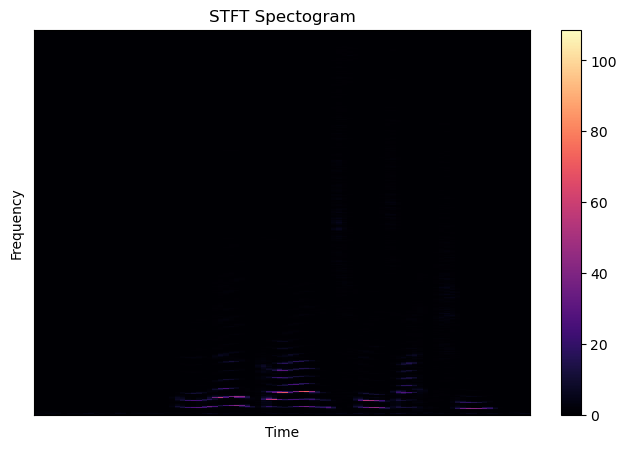

In [28]:
plt.figure(figsize=fig_size)
disp.specshow(spectogram,sr=sample_rate,hop_length=hop_len)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("STFT Spectogram")
plt.colorbar()

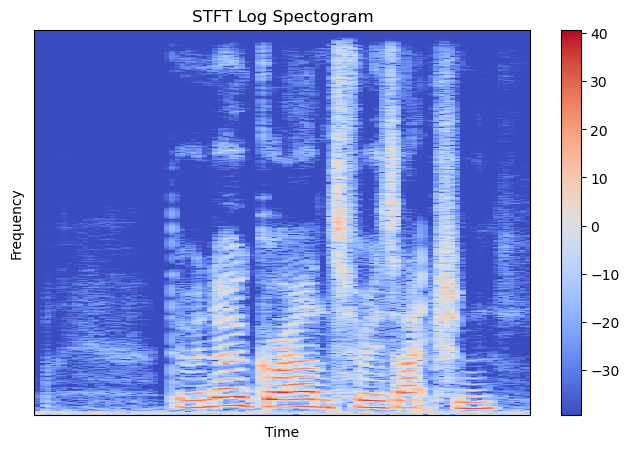

In [29]:
plt.figure(figsize=fig_size)
log_spectogram = libr.amplitude_to_db(spectogram)
disp.specshow(log_spectogram,sr=sample_rate,hop_length=hop_len)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("STFT Log Spectogram")
plt.colorbar()

In [30]:
n_coeffs = 15
mfcc = libr.feature.mfcc(y=clean_signal,n_fft=n_fft, hop_length=hop_len, n_mfcc=n_coeffs)

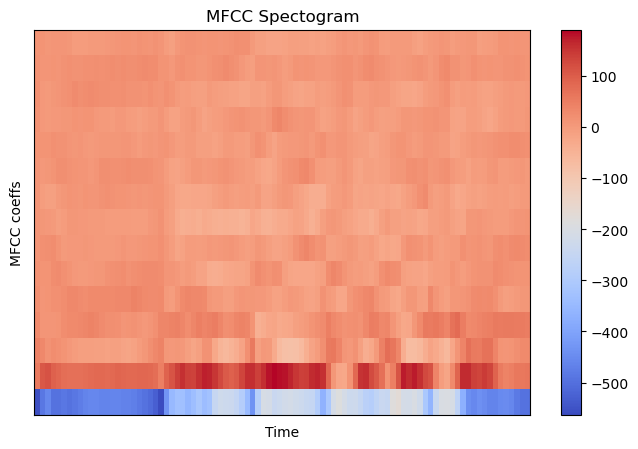

In [31]:
plt.figure(figsize=fig_size)
disp.specshow(mfcc,sr=sample_rate,hop_length=hop_len)
plt.xlabel("Time")
plt.ylabel("MFCC coeffs")
plt.title("MFCC Spectogram")
plt.colorbar()

In [32]:
mfcc.shape

(15, 92)